# Prepare

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import env
import acquire

**Get dataq**

In [2]:
# db_name = "tsa_item_demand"
# query = """
# SELECT *
# FROM items
# JOIN sales USING(item_id)
# JOIN stores USING(store_id);
# """

# # using codeup dataset
# items = pd.read_sql(query, env.get_db_access(db_name))

# # save to csv
# items.to_csv("./store_item_sales.csv", mode= "w")

In [3]:
# read in the data
store_items = pd.read_csv("store_item_sales.csv", index_col= 0)

store_items.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [4]:
store_items.shape

(913000, 14)

In [5]:
store_items.dtypes

store_id           int64
item_id            int64
item_upc14         int64
item_upc12         int64
item_brand        object
item_name         object
item_price       float64
sale_id            int64
sale_date         object
sale_amount        int64
store_address     object
store_zipcode      int64
store_city        object
store_state       object
dtype: object

**Convert date column data types**

In [6]:
# change the datatype of sale date
store_items.sale_date = store_items.sale_date.astype("datetime64")

**Set the index to be the datetime variable**

In [7]:
# set index
store_items = store_items.set_index("sale_date")
store_items.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


**Plot the distributions**

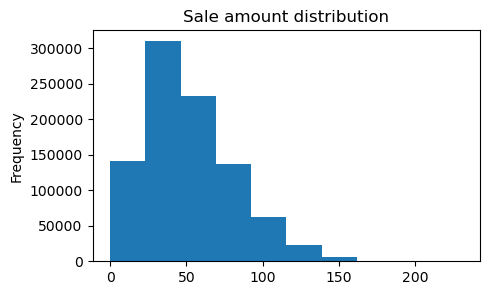

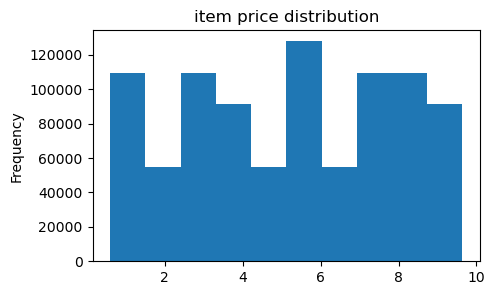

In [8]:
plt.figure(figsize=(5,3))
store_items.sale_amount.plot(kind="hist")
plt.title("Sale amount distribution")
plt.show()

plt.figure(figsize=(5,3))
store_items.item_price.plot(kind="hist")
plt.title("item price distribution")
plt.show()

**Add a 'month' and 'day of week' column to your dataframe.**

In [9]:
# Add a 'month' and 'day of week' column to your dataframe
store_items["month"] = store_items.index.month
store_items["month_name"] = store_items.index.month_name()
store_items["weekday"] = store_items.index.weekday
store_items["weekday_name"] = store_items.index.day_name()
store_items["day"] = store_items.index.day

In [10]:
store_items.head(1)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,month_name,weekday,weekday_name,day
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,1,Tuesday,1


**Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price**

In [11]:
# create a total sale colum
store_items["sales_total"] = store_items.sale_amount * store_items.item_price

**Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.**

In [12]:
def get_store_item_sales_clean():
    if os.path.exists("./store_item_sales.csv"):
        # read in the data
        store_items = pd.read_csv("store_item_sales.csv", index_col= 0)
    else:
        db_name = "tsa_item_demand"
        query = """
        SELECT *
        FROM items
        JOIN sales USING(item_id)
        JOIN stores USING(store_id);
        """

        # using codeup dataset
        store_items = pd.read_sql(query, env.get_db_access(db_name))

        # save to csv
        store_items.to_csv("./store_item_sales.csv", mode= "w")
        
    # change the datatype of sale date
    store_items.sale_date = store_items.sale_date.astype("datetime64")
    
    # set index
    store_items = store_items.set_index("sale_date")
    
    # Add a 'month' and 'day of week' column to your dataframe
    store_items["month"] = store_items.index.month
    store_items["month_name"] = store_items.index.month_name()
    store_items["weekday"] = store_items.index.weekday
    store_items["weekday_name"] = store_items.index.day_name()
    store_items["day"] = store_items.index.day
    
    # create a total sale colum
    store_items["sales_total"] = store_items.sale_amount * store_items.item_price

    return store_items

In [13]:
get_store_item_sales_clean().head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,month_name,weekday,weekday_name,day,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,1,Tuesday,1,10.92
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,2,Wednesday,2,9.24
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,3,Thursday,3,11.76
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,4,Friday,4,10.92
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,January,5,Saturday,5,8.40


### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [2]:
ops = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
ops.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
ops.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

**Convert date column to datetime format**

In [4]:
# covert date columns to datetime
ops.Date = ops.Date.astype("datetime64")

**Set index**

In [5]:
ops = ops.set_index("Date")

**Fill null**

In [6]:
cols = ops.columns
for i in cols:
    ops[i] = ops[i].fillna(ops[i].mean())

**Plot the distribution of each of your variables.**

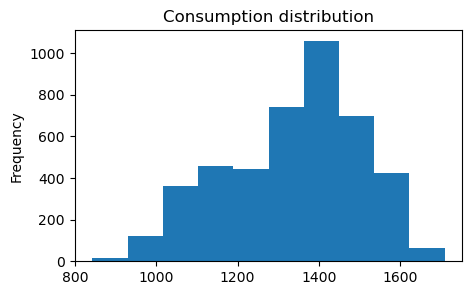

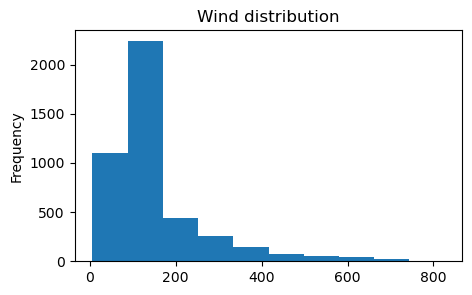

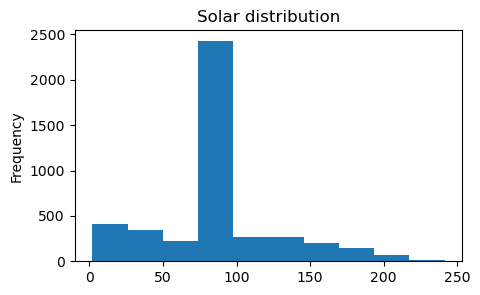

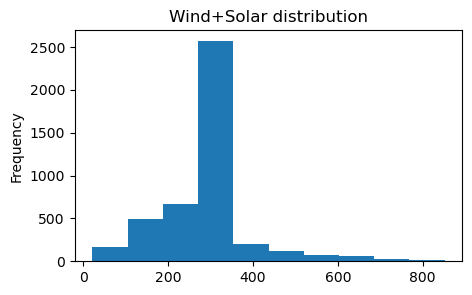

In [7]:
cols = ops.columns

for ele in cols:
    plt.figure(figsize = (5,3))
    ops[ele].plot(kind ="hist")
    plt.title(ele + " distribution")
    plt.show()

**Add a month and a year column to your dataframe.**

In [8]:
ops["year"] = ops.index.year
ops["month"] = ops.index.month
ops["month_name"] = ops.index.month_name()

In [9]:
ops.head(2)

,Consumption,Wind,Solar,Wind+Solar,year,month,month_name
Date,,,,,,,
2006-01-01,1069.184,164.814173,89.258695,272.663481,2006,1,January
2006-01-02,1380.521,164.814173,89.258695,272.663481,2006,1,January


**Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.**

In [10]:
def get_ops_clean():
    ops = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")

    # covert date columns to datetime
    ops.Date = ops.Date.astype("datetime64")
    
    # Set index
    ops = ops.set_index("Date")
    
    cols = ops.columns
    for i in cols:
        ops[i] = ops[i].fillna(ops[i].mean())
    
    ops["year"] = ops.index.year
    ops["month"] = ops.index.month
    ops["month_name"] = ops.index.month_name()
    
    return ops

In [11]:
get_ops_clean()

,Consumption,Wind,Solar,Wind+Solar,year,month,month_name
Date,,,,,,,
2006-01-01,1069.18400,164.814173,89.258695,272.663481,2006,1,January
2006-01-02,1380.52100,164.814173,89.258695,272.663481,2006,1,January
2006-01-03,1442.53300,164.814173,89.258695,272.663481,2006,1,January
2006-01-04,1457.21700,164.814173,89.258695,272.663481,2006,1,January
2006-01-05,1477.13100,164.814173,89.258695,272.663481,2006,1,January
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507000,16.530000,411.037000,2017,12,December
2017-12-28,1299.86398,506.424000,14.162000,520.586000,2017,12,December
2017-12-29,1295.08753,584.277000,29.854000,614.131000,2017,12,December
